In [16]:
## Import Statements for the Random Forest Classifier
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

### Load Data From CSV and Display

In [17]:

data = pd.read_csv('dataset/ObesityDataSet_raw_and_data_sinthetic.csv')
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


### Data set is a bit messy with unrounded values. Round function performed to round values to whole numbers or two decimal places.

In [18]:
rounded_data = data.copy()
## Round the data to the nearest whole number using the apply function and lambda function of rounding
rounded_data['Age'] = rounded_data['Age'].apply(lambda age : round(age)) 
rounded_data['Height'] = rounded_data['Height'].apply(lambda height : round(height, 2)) 
rounded_data['Weight'] = rounded_data['Weight'].apply(lambda weight : round(weight)) 
rounded_data['FCVC'] = data['FCVC'].apply(lambda fcvc : round(fcvc)) 
rounded_data['NCP'] = rounded_data['NCP'].apply(lambda ncp : round(ncp)) 
rounded_data['CH2O'] = rounded_data['CH2O'].apply(lambda ch2o : round(ch2o)) 
rounded_data['FAF'] = rounded_data['FAF'].apply(lambda faf : round(faf)) 
rounded_data['TUE'] = rounded_data['TUE'].apply(lambda tue : round(tue))

rounded_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,90,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,134,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,134,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


## Data Distributions

### Different distributions are plotted for each variable
### Continuous Data is plotted with an estimated line of regression

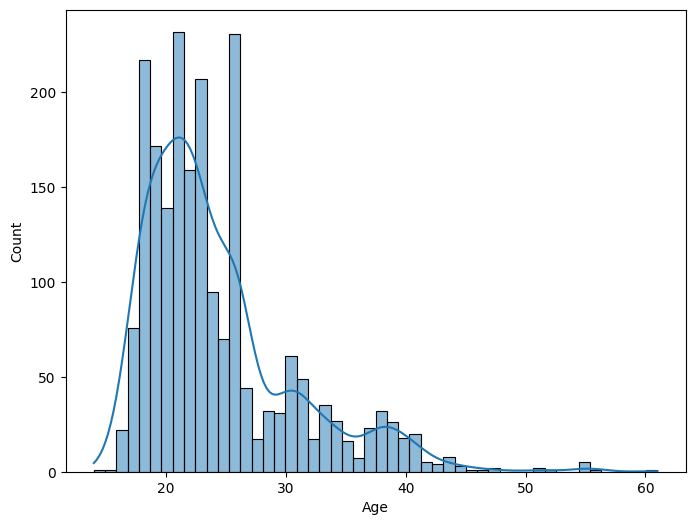

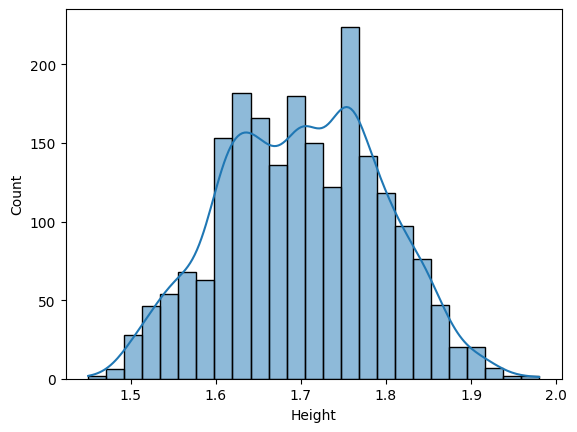

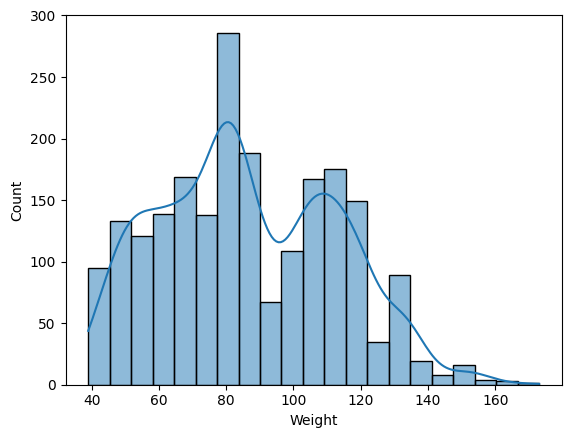

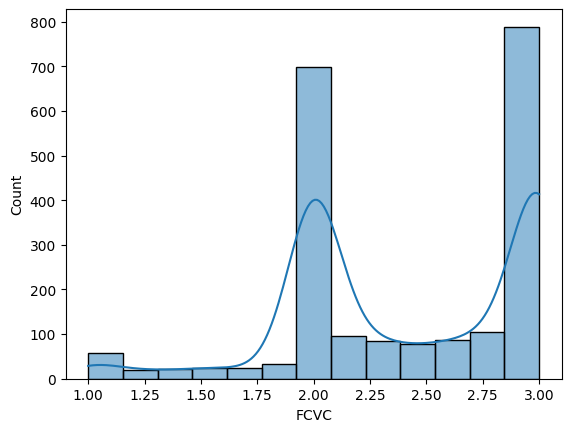

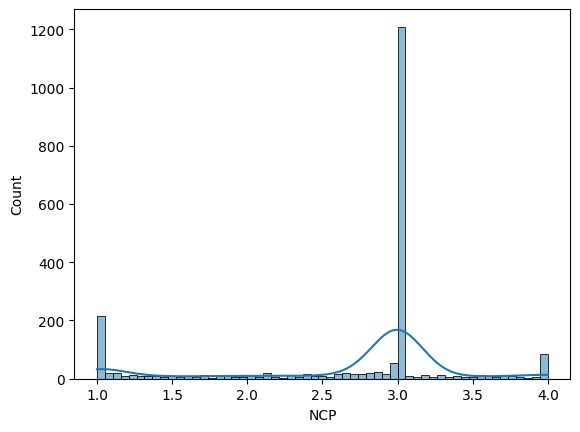

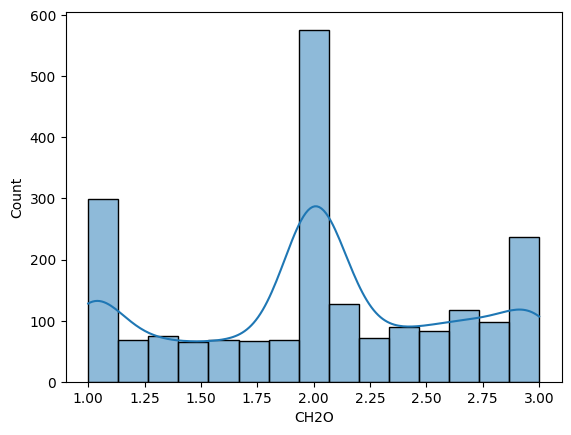

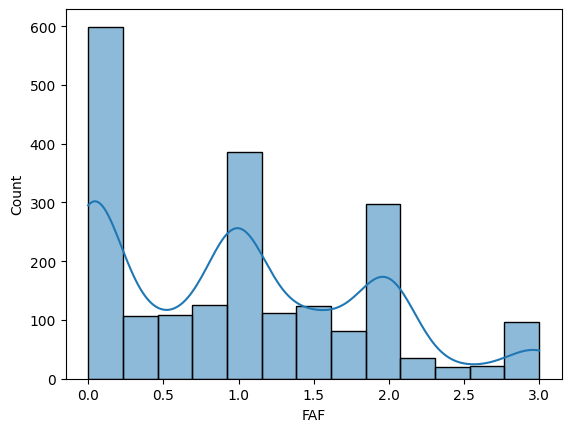

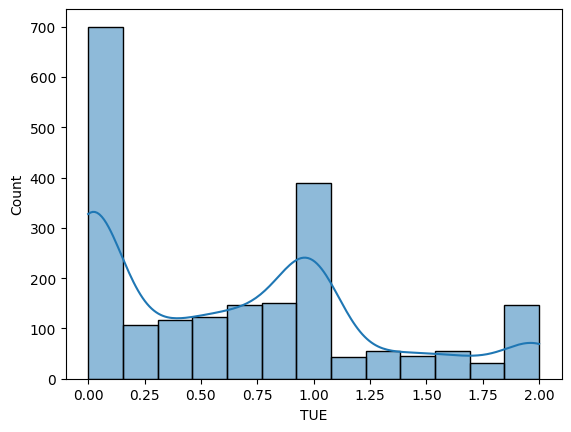

In [19]:
numerical_data = data.columns[data.dtypes != 'object']
categorical_data = data.columns[data.dtypes == 'object']
## Plot numerical data using a histogram and kernel density estimation which is a smoothed histogram showing the distribution of the data
plt.figure(figsize=(8,6))
x=0
for i in numerical_data:
    sns.histplot(data=data,x=i,kde=True)
    print('\n')
    plt.show()


### Categorical Data is plotted with simple histogram comparing quantities of each category

<Figure size 800x600 with 0 Axes>

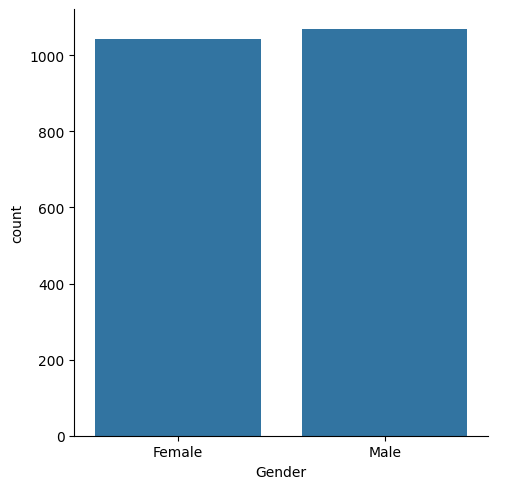

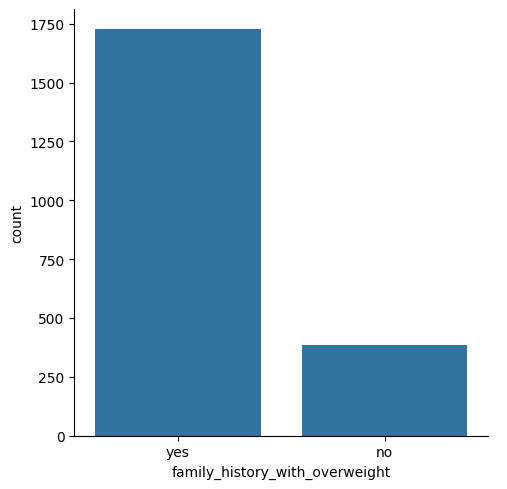

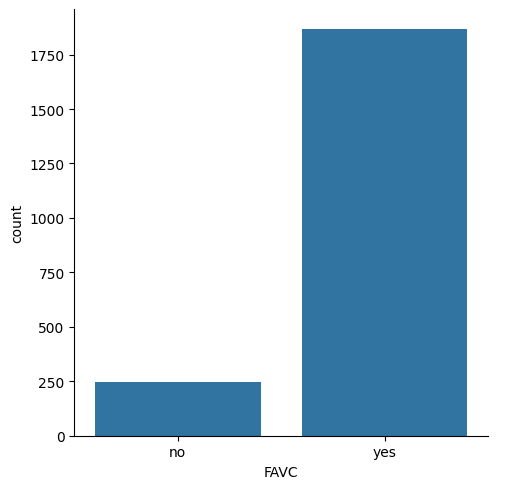

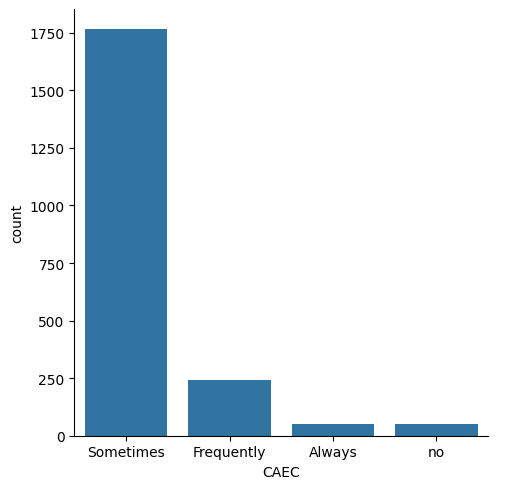

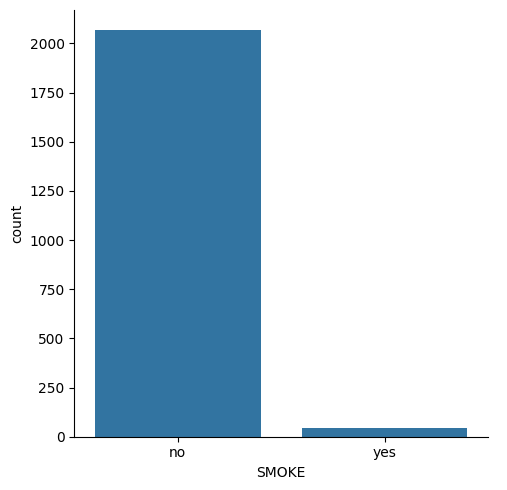

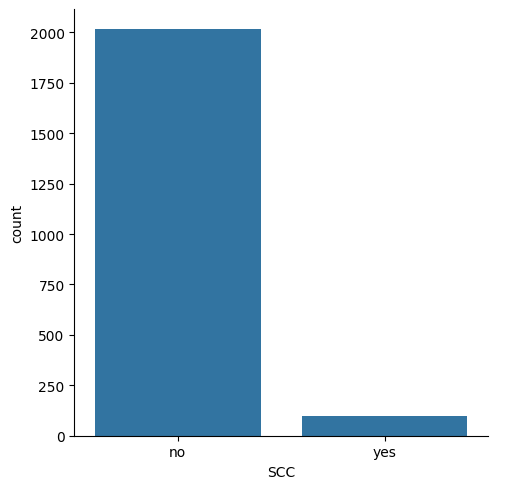

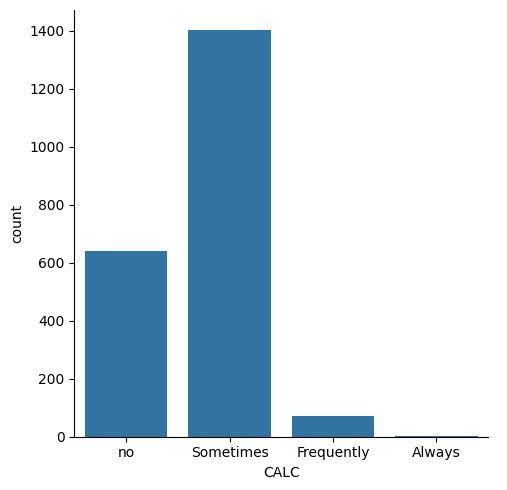

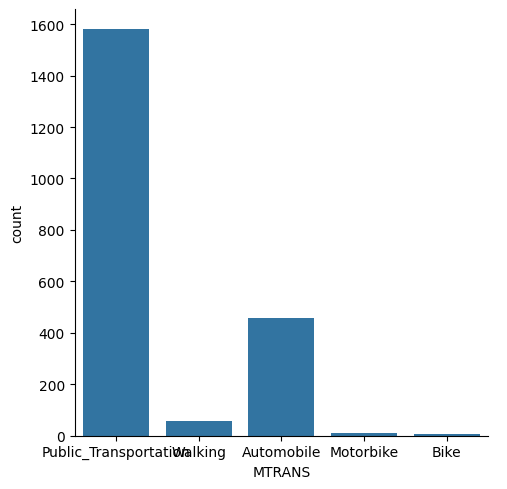

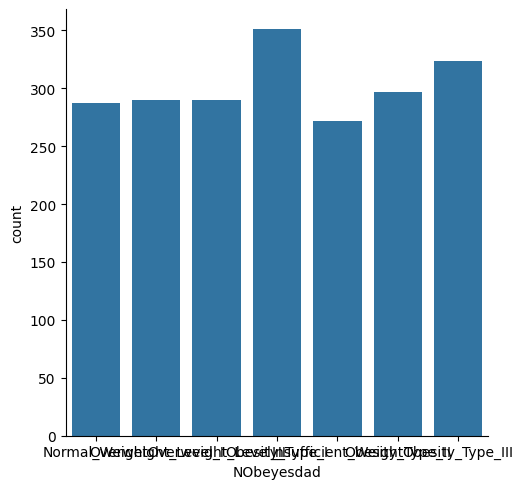

In [20]:
plt.figure(figsize=(8,6))
for i in categorical_data:
    sns.catplot(data=data,x=i,kind='count')
    print('\n')
    plt.show()



## Outlier detection

### Outliers are detected and filtered to improve model accuracy

### We use interquartile ranges to calculate upper and lower limits. These values are necessary to determine which data points are considered outliers.

In [21]:
# Focusing on some of the continuous variables that could be recognized for their presence of outliers: Age, Height, Weight
outlier_data = rounded_data.copy()
outlier_data = outlier_data[['Age', 'Height', 'Weight']]


# 1st and 3rd quartile for Age
Age_Q1 = outlier_data['Age'].quantile(0.25)
Age_Q3 = outlier_data['Age'].quantile(0.75)
print('First Quartile - AGE:', Age_Q1)
print('Third Quartile - AGE:', Age_Q3)
print()
# 1st and 3rd quartile for Weight
Weight_Q1 = outlier_data['Weight'].quantile(0.25)
Weight_Q3 = outlier_data['Weight'].quantile(0.75)
print('First Quartile - WEIGHT:', Weight_Q1)
print('Third Quartile - WEIGHT:', Weight_Q3)
print()

# 1st and 3rd quartile for Height
Height_Q1 = outlier_data['Height'].quantile(0.25)
Height_Q2 = outlier_data['Height'].quantile(0.75)
print('First Quartile - HEIGHT:', Height_Q1)
print('Third Quartile - HEIGHT:', Height_Q2)
print()

# Interquartile range calculations
interquartile_range_Age = Age_Q3 - Age_Q1
interquartile_range_Weight = Weight_Q3 - Weight_Q1
interquartile_range_Height = Height_Q2 - Height_Q1


## Upper and lower limit calculations
lower_limit_Age = Age_Q1 - 1.5 * interquartile_range_Age
upper_limit_Age = Age_Q3 + 1.5 * interquartile_range_Age

lower_limit_Weight = Weight_Q1 - 1.5 * interquartile_range_Weight
upper_limit_Weight = Weight_Q3 + 1.5 * interquartile_range_Weight

lower_limit_Height = Height_Q1 - 1.5 * interquartile_range_Height
upper_limit_Height = Height_Q2 + 1.5 * interquartile_range_Height

print('Lower Limit - AGE:', lower_limit_Age)
print('Upper Limit - AGE:', upper_limit_Age)
print()
print('Lower Limit - WEIGHT:', lower_limit_Weight)
print('Upper Limit - WEIGHT:', upper_limit_Weight)
print()
print('Lower Limit - HEIGHT:', lower_limit_Height)
print('Upper Limit - HEIGHT:', upper_limit_Height)

First Quartile - AGE: 20.0
Third Quartile - AGE: 26.0

First Quartile - WEIGHT: 65.5
Third Quartile - WEIGHT: 107.0

First Quartile - HEIGHT: 1.63
Third Quartile - HEIGHT: 1.77

Lower Limit - AGE: 11.0
Upper Limit - AGE: 35.0

Lower Limit - WEIGHT: 3.25
Upper Limit - WEIGHT: 169.25

Lower Limit - HEIGHT: 1.4199999999999997
Upper Limit - HEIGHT: 1.9800000000000002


### The outliers are filtered if they are outside of the lower limit or upper limit of each value. 

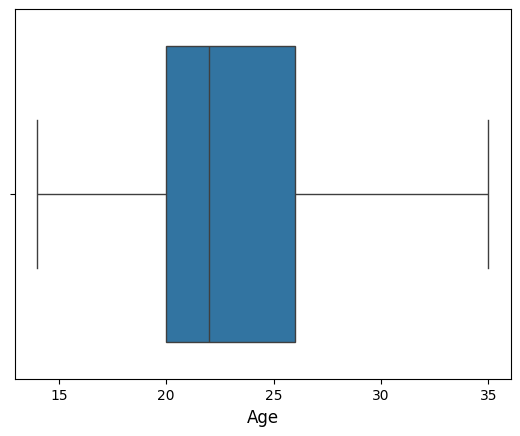

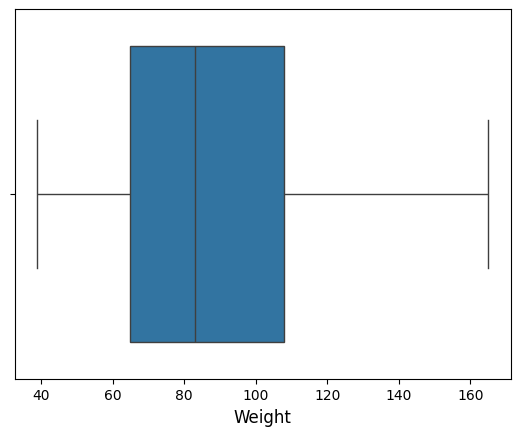

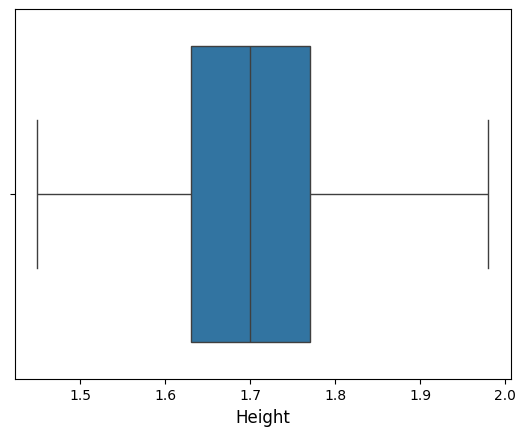

In [22]:
filtered_data = rounded_data.copy()

## Remove outliers from the data by filtering the data based on the calculated upper and lower limits

filtered_data.drop(filtered_data[(filtered_data['Age'] < lower_limit_Age) | (filtered_data['Age'] > upper_limit_Age)].index, inplace = True)
filtered_data.drop(filtered_data[(filtered_data['Weight'] < lower_limit_Weight) | (filtered_data['Weight'] > upper_limit_Weight)].index, inplace = True)
filtered_data.drop(filtered_data[(filtered_data['Height'] < lower_limit_Height) | (filtered_data['Height'] > upper_limit_Height)].index, inplace = True)

## Plot data demonstrating removed outliers
sns.boxplot(x = 'Age', data = filtered_data)
plt.xticks(fontsize=10)
plt.xlabel('Age', fontsize=12)
plt.show()

sns.boxplot(x = 'Weight', data = filtered_data)
plt.xticks(fontsize=10)
plt.xlabel('Weight', fontsize=12)
plt.show()


sns.boxplot(x = 'Height', data = filtered_data)
plt.xticks(fontsize=10)
plt.xlabel('Height', fontsize=12)
plt.show()

## Data Preprocessing

### Categorically transform all data that is not continuous or binary. 
### This requires mapping data to a particular integer
### For Binary, the value is either mapped to 0 or 1
### For Multiple, the value is mapped to a dictionary that defines the integer associated with the value. 

In [23]:
# One-Hot Encoding: Used for nominal categorical data
copy = filtered_data.copy()

# Specify the columns to encode, this is for binary
encoder = ce.OneHotEncoder(cols=['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS'])
data_with_ohe = encoder.fit_transform(copy)

# Ordinal Encoding: Used for ordinal categorical data
ordinances = ce.OrdinalEncoder(mapping= 
[{'col': 'CAEC', 'mapping': {'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3}},
{'col': 'CALC', 'mapping': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}},
{'col':'NObeyesdad','mapping':{'Insufficient_Weight':0,'Normal_Weight':1,'Overweight_Level_I':2,'Overweight_Level_II':3,'Obesity_Type_I':4,'Obesity_Type_II':5,'Obesity_Type_III':6}}])

encoded_data = ordinances.fit_transform(data_with_ohe)

encoded_data

,Gender_1,Gender_2,Age,Height,Weight,family_history_with_overweight_1,family_history_with_overweight_2,FAVC_1,FAVC_2,FCVC,...,SCC_2,FAF,TUE,CALC,MTRANS_1,MTRANS_2,MTRANS_3,MTRANS_4,MTRANS_5,NObeyesdad
0,1,0,21,1.62,64,1,0,1,0,2,...,0,0,1,0,1,0,0,0,0,1
1,1,0,21,1.52,56,1,0,1,0,3,...,1,3,0,1,1,0,0,0,0,1
2,0,1,23,1.80,77,1,0,1,0,2,...,0,2,1,2,1,0,0,0,0,1
3,0,1,27,1.80,87,0,1,1,0,3,...,0,2,0,2,0,1,0,0,0,2
4,0,1,22,1.78,90,0,1,1,0,2,...,0,0,0,1,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,0,21,1.71,131,1,0,0,1,3,...,0,2,1,1,1,0,0,0,0,6
2107,1,0,22,1.75,134,1,0,0,1,3,...,0,1,1,1,1,0,0,0,0,6
2108,1,0,23,1.75,134,1,0,0,1,3,...,0,1,1,1,1,0,0,0,0,6
2109,1,0,24,1.74,133,1,0,0,1,3,...,0,1,1,1,1,0,0,0,0,6


## Data Standardization

### Ensures that all features are scaled and contribute equally to the model. This will prevent features with larger ranges from affecting more.

### We can see in the first image the difference in ranges of values
### The second figure demonstrates the scaled data

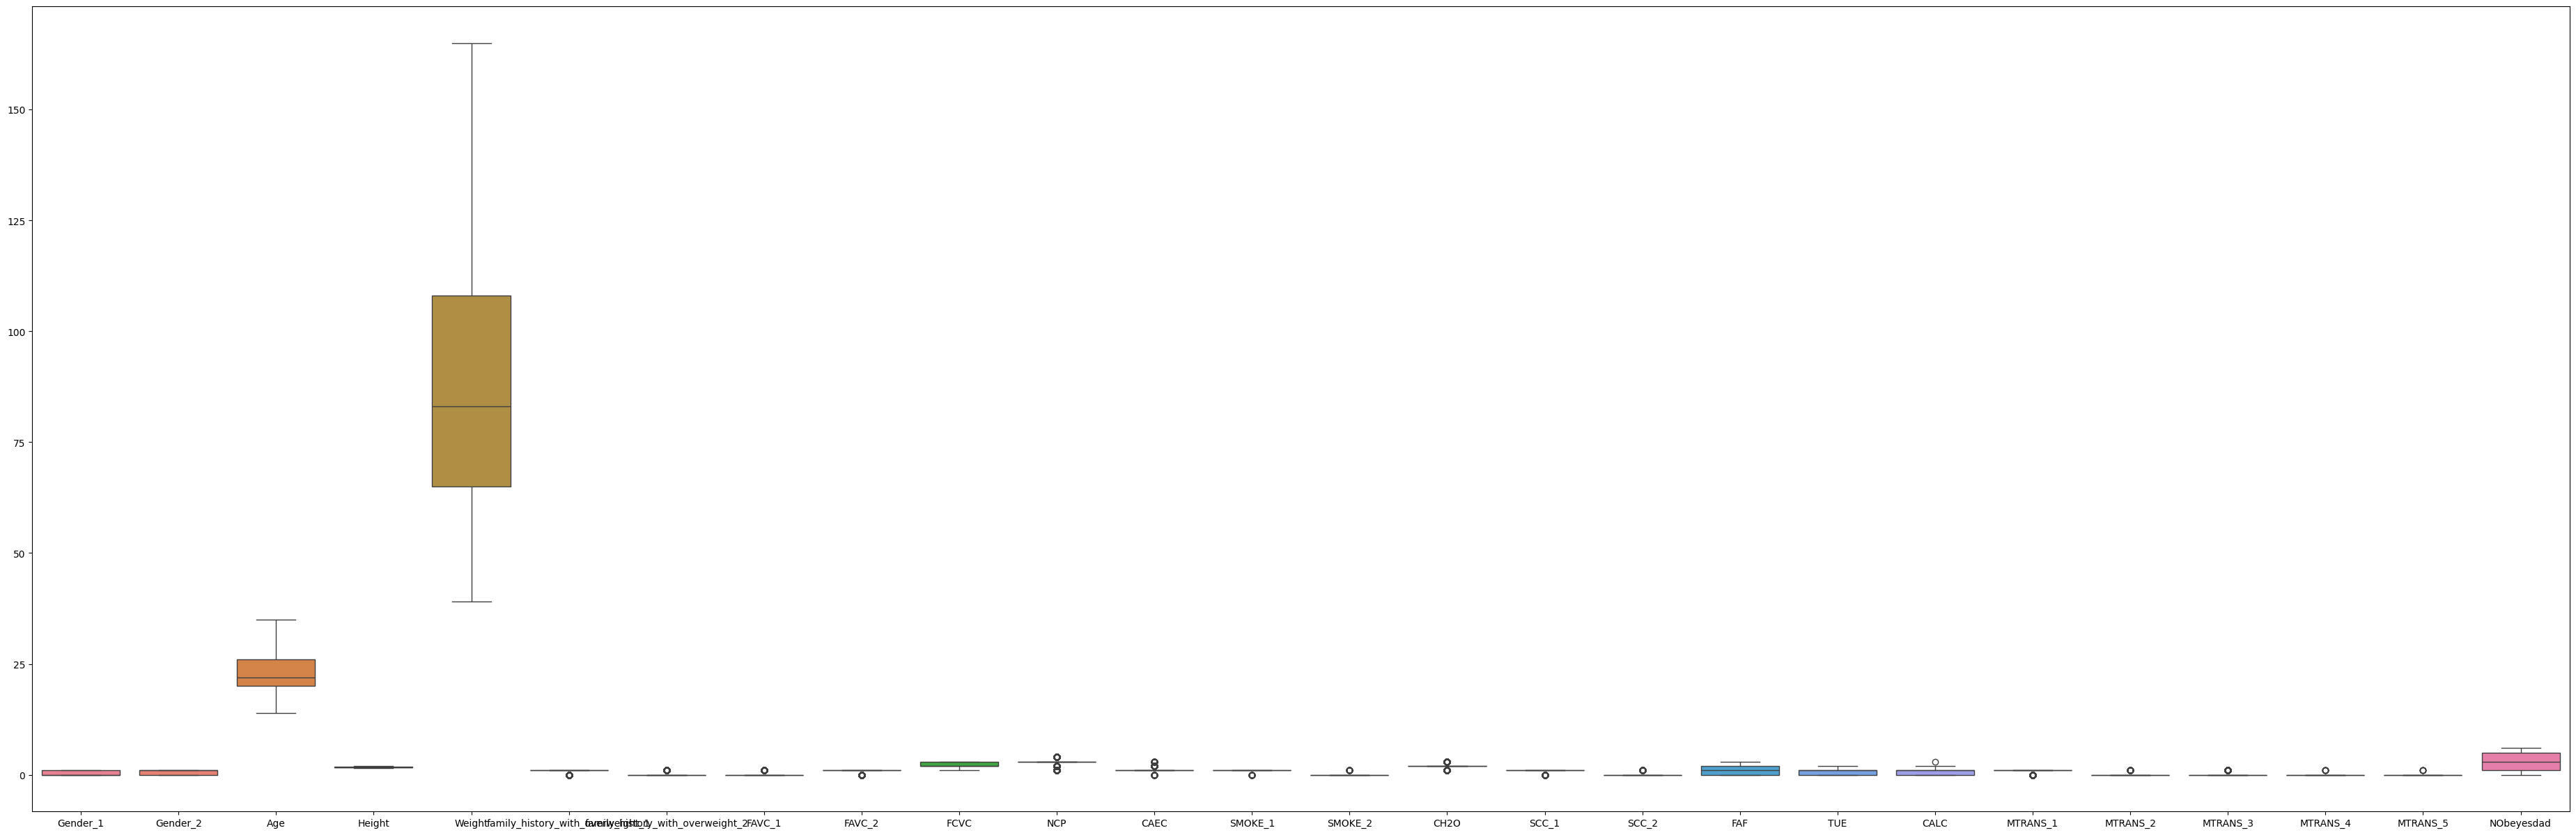

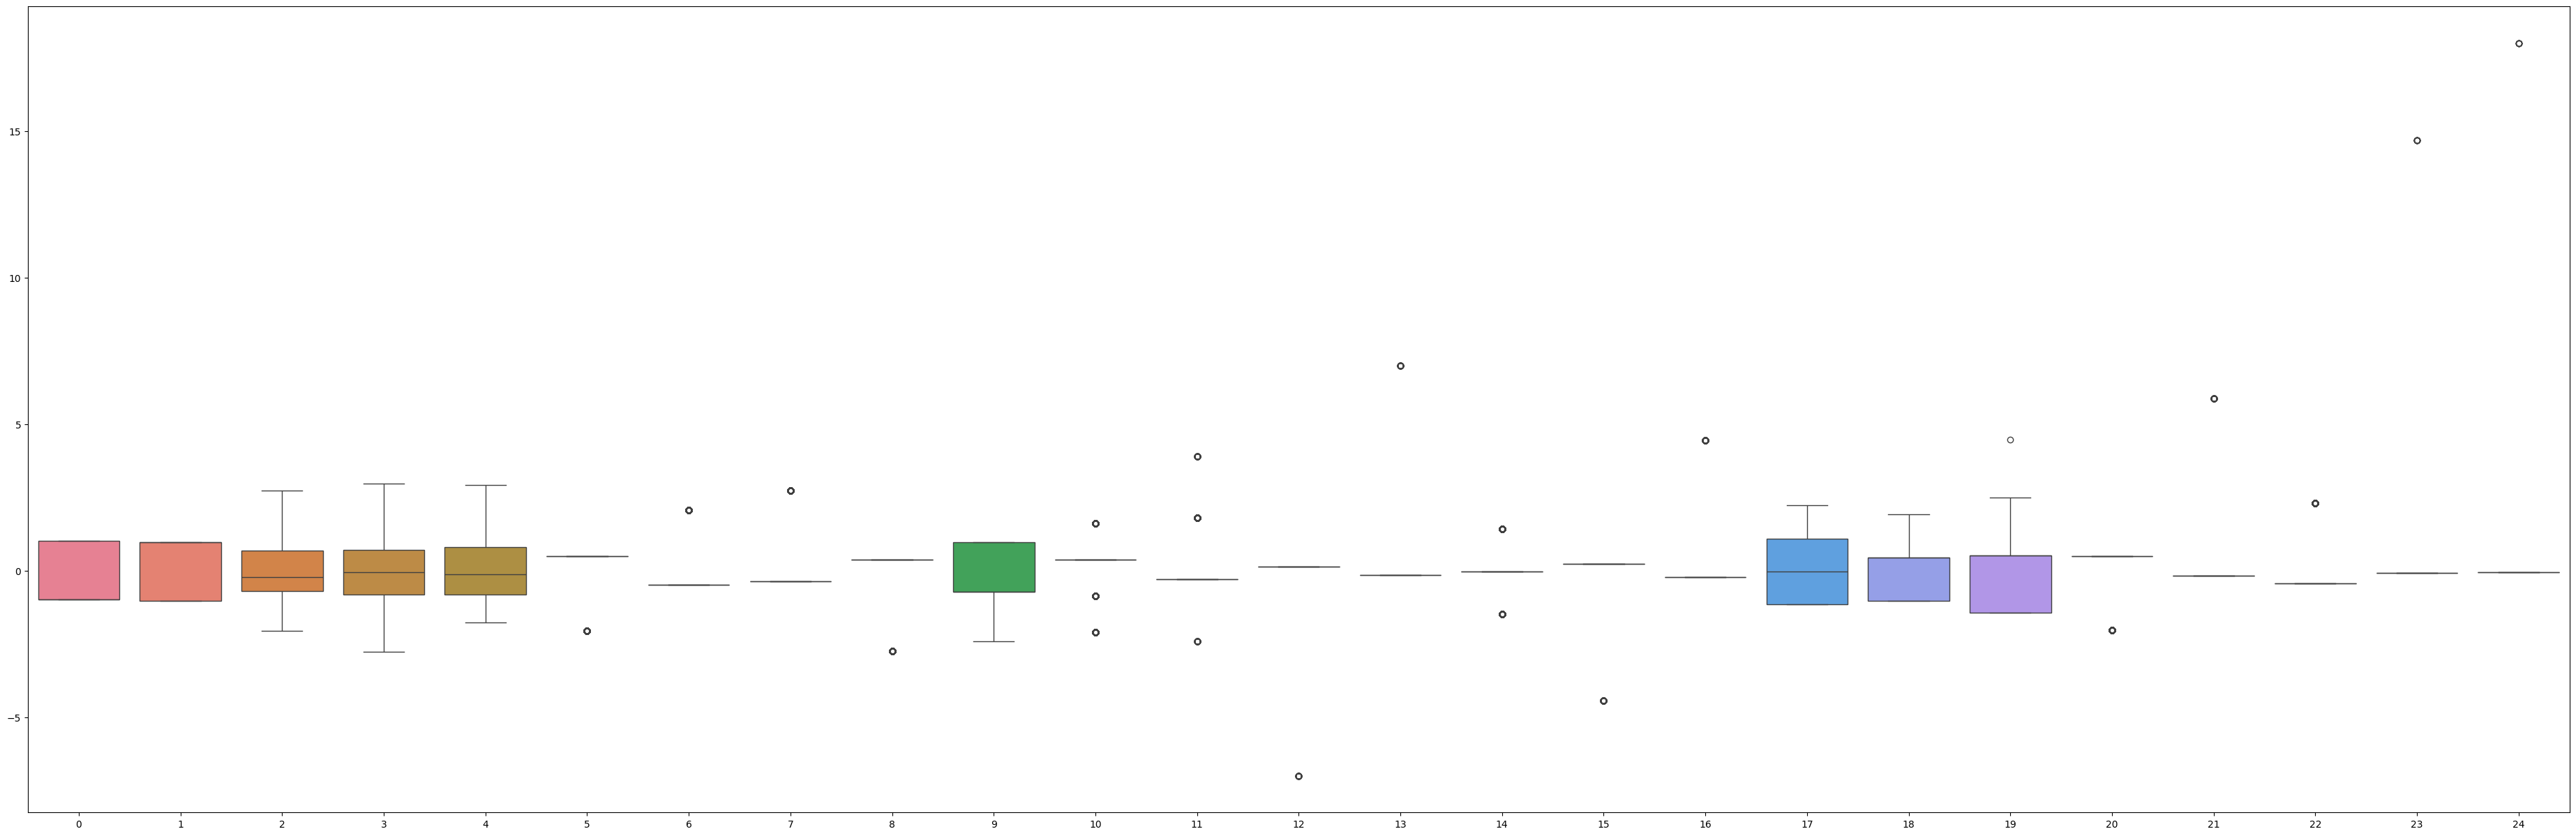

In [24]:
plt.figure(figsize=(47, 15))
ax = sns.boxplot(data=encoded_data)

scale = StandardScaler()
data_scaled = scale.fit_transform(encoded_data.iloc[:, :-1])

plt.figure(figsize=(47, 15))
ax = sns.boxplot(data=data_scaled)

## Random Forest Classification

### Determine the x and y values, splits the data set for training and testing.

### Data is split 70-30 

In [25]:
x_classification = data_scaled
y_classification = encoded_data.iloc[:, -1]

scaled_X_train, scaled_X_test, y_train, y_test = train_test_split(x_classification, y_classification, test_size=0.3, random_state=0)

### Complete Random Forest Classification and fit training data
### Cross Validation 10 times to improve accuracy 

In [26]:
random_forest = RandomForestClassifier(random_state=1)

cross_validation = cross_val_score(random_forest, scaled_X_train, y_train, cv=10)
print('Cross Validation Score:', cross_validation.mean())

random_forest.fit(scaled_X_train, y_train)

Cross Validation Score: 0.9333565908115071


RandomForestClassifier(random_state=1)

### Make prediction on the test data and determine the model's accuracy

In [27]:
predictions = random_forest.predict(scaled_X_test)
print('Accuracy of Random Forest on Test Set: {:.2f}'.format(accuracy_score(y_test, predictions)))


Accuracy of Random Forest on Test Set: 0.95


## Consfusion Matrix

### Displays comparison between real and predicted obesity values

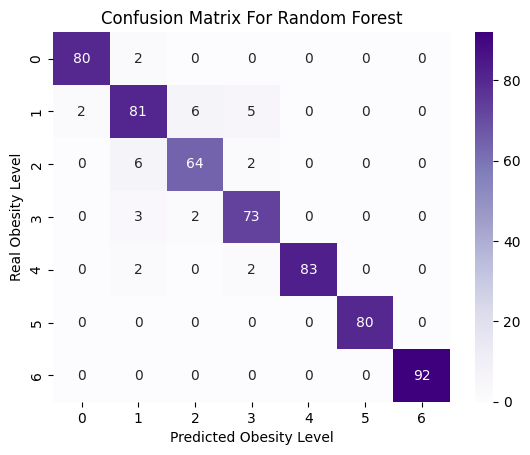

In [28]:
confusion = confusion_matrix(y_test, predictions)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix For Random Forest')
plt.xlabel('Predicted Obesity Level')
plt.ylabel('Real Obesity Level')
plt.show()

## The following section is simply to be utilized by the application
### Saves the current state of the model, encoders, and scaler to ensure similar prediction are made from a users input without having to train the model for every user input.

In [29]:

import pickle

with open('obesity_prediction_model.pkl', 'wb') as file:
    pickle.dump(random_forest, file)
    
with open('numerical_encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scale, file)

with open('ordinal_encoder.pkl', 'wb') as file:
    pickle.dump(ordinances, file)
